In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
fig, graph = plt.subplots()

data_points = np.array([
    [ 493.6490,     0],
    [ 726.4623,   0.7],
    [ 900.5072,  10.4],
    [1034.3531,  37.0],
    [1144.1591,  77.4],
    [1239.1082, 122.8],
    [1324.5908, 169.5],
    [1403.8782, 216.0],
#     [1472.7344, 254.0],
#     [1539.8375, 286.0],
#     [1599.7332, 314.0],
#     [1659.7289, 336.0]
])

x, y = data_points.T
# graph.plot(x, y, 'bo')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
line = np.polyfit(x, y, 1)
print(line)

[   0.23783957 -166.54378309]


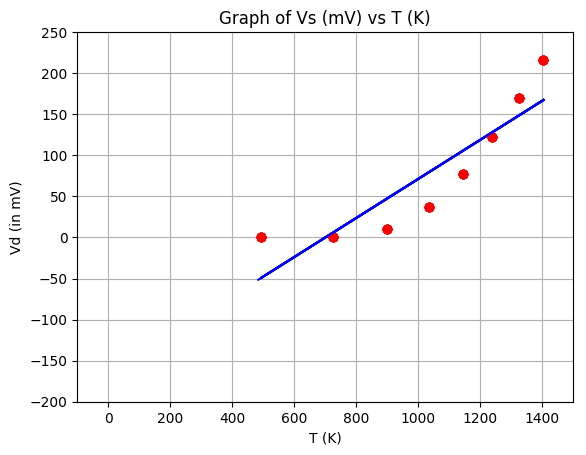

In [9]:
def lineeqn(xo):
    return line[0]*xo + line[1]

graph.set(
    xlabel = "T (K)",
    ylabel = "Vd (in mV)",
    title = "Graph of Vs (mV) vs T (K)",
    xlim = [-100, 1500],
    ylim = [-200, 250]
)

graph.plot(x, y, 'ro')
limx = [0] + x
graph.plot(limx, lineeqn(limx), 'b')

graph.grid()

fig

In [12]:
vsd = [j - line[1] for j in y]

stefs = []
for l in range(len(vsd)):
    stefs.append(2.43*10**(-7)*vsd[l]/x[l])

In [13]:
VbyT = [vsd[i]/x[i] for i in range(len(vsd))]
pd.DataFrame(
    np.transpose([x, y, vsd, VbyT, stefs]),
    columns=[
        "Temperature (K)",
        "Vs (mV)",
        "Vs\' = Vs + Vo (mV)",
        "Vs\' by T",
        "Stefan's Constant"
    ]
)

,Temperature (K),Vs (mV),Vs' = Vs + Vo (mV),Vs' by T,Stefan's Constant
0,493.6490,0.0,166.543783,0.337373,8.198161e-08
1,726.4623,0.7,167.243783,0.230217,5.594267e-08
2,900.5072,10.4,176.943783,0.196493,4.774791e-08
3,1034.3531,37.0,203.543783,0.196784,4.781843e-08
4,1144.1591,77.4,243.943783,0.213208,5.180952e-08
5,1239.1082,122.8,289.343783,0.233510,5.674286e-08
6,1324.5908,169.5,336.043783,0.253696,6.164820e-08
7,1403.8782,216.0,382.543783,0.272491,6.621525e-08


In [14]:
print(
    "The setfan's Constant calculated by the experiment is ",
    "%.3e" % np.mean(stefs)
)
fig.savefig('final_graph.png', dpi = 300)

The setfan's Constant calculated by the experiment is  5.874e-08
